Оптимальная стратегия лидера: [ 0. 10.]
Максимальная прибыль: 160.0000000000033


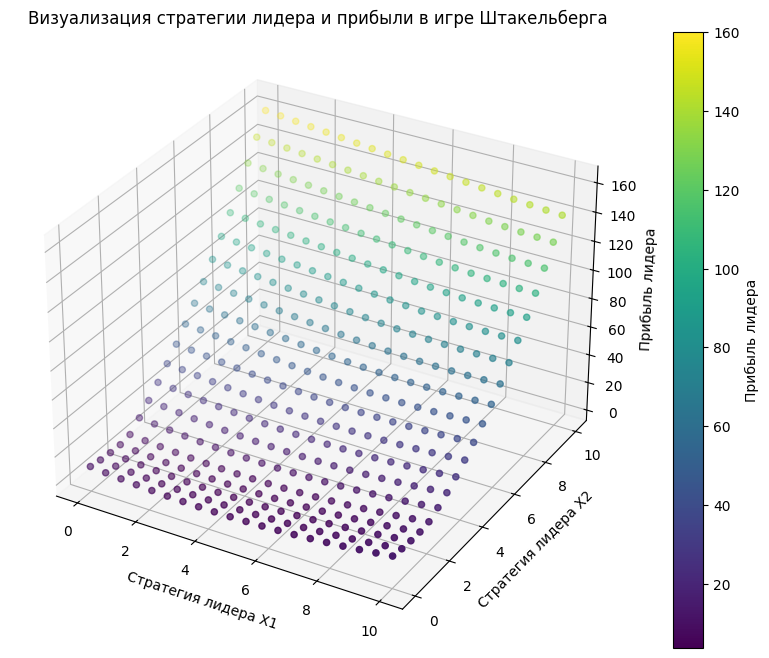

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Нелинейные функции прибыли/затрат лидера и последователя
def leader_profit(x):
    return -((2 * x[0] - x[1] ** 2 + 3 * x[1]) - 10)  # Нелинейная прибыль лидера (негатив для максимизации)

def follower_cost(y, leader_strategy):
    return (y[0] ** 2 + 2 * y[1] - leader_strategy[0] * y[0] - leader_strategy[1] * y[1])  # Нелинейные затраты последователя

# Многомерные ограничения для последователя
constraints_follower = [
    {'type': 'ineq', 'fun': lambda y: 10 - y[0] - y[1]},   # Пример ограничения: y0 + y1 <= 10
    {'type': 'ineq', 'fun': lambda y: y[0]},               # Пример ограничения: y0 >= 0
    {'type': 'ineq', 'fun': lambda y: y[1]}                # Пример ограничения: y1 >= 0
]

# Функция для нахождения реакции последователя на стратегию лидера
def follower_response(leader_strategy):
    result = minimize(lambda y: follower_cost(y, leader_strategy), x0=[1, 1], constraints=constraints_follower)
    return result.x if result.success else None

# Оптимизация стратегии лидера с учетом реакции последователя
def stackelberg_solution():
    best_leader_strategy = None
    best_profit = float("-inf")
    strategies = []
    profits = []

    # Поиск оптимальной стратегии лидера
    for leader_x1 in np.linspace(0, 10, 20):
        for leader_x2 in np.linspace(0, 10, 20):
            leader_strategy = np.array([leader_x1, leader_x2])
            follower_strategy = follower_response(leader_strategy)

            if follower_strategy is not None:
                # Расчет прибыли лидера
                profit = leader_profit(leader_strategy) - follower_cost(follower_strategy, leader_strategy)

                strategies.append((leader_strategy[0], leader_strategy[1], profit))
                profits.append(profit)

                # Сравниваем прибыль с максимальной найденной
                if profit > best_profit:
                    best_profit = profit
                    best_leader_strategy = leader_strategy

    return best_leader_strategy, best_profit, strategies, profits

# Запуск решения игры
leader_strategy, max_profit, strategies, profits = stackelberg_solution()
print(f"Оптимальная стратегия лидера: {leader_strategy}")
print(f"Максимальная прибыль: {max_profit}")

# Визуализация
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Разбиваем стратегии и прибыли для графика
x, y, z = zip(*strategies)

# Визуализация стратегий и прибыли
scatter = ax.scatter(x, y, z, c=profits, cmap='viridis')
ax.set_xlabel("Стратегия лидера X1")
ax.set_ylabel("Стратегия лидера X2")
ax.set_zlabel("Прибыль лидера")
fig.colorbar(scatter, ax=ax, label="Прибыль лидера")

plt.title("Визуализация стратегии лидера и прибыли в игре Штакельберга")
plt.show()
